In [154]:
from cam_server import PipelineClient
from cam_server.utils import get_host_port_from_stream_address
from bsread import source, SUB
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [155]:
def get_image(camName, ROI, numImg, angle):
    pipeline_client = PipelineClient()
    pipeline_config = {"camera_name": camName, "image_region_of_interest": ROI}
    pipeline_config = {"camera_name": camName,"rotation":angle}
    
    instance_id, pipeline_stream_address = pipeline_client.create_instance_from_config(pipeline_config)
    pipeline_host, pipeline_port = get_host_port_from_stream_address(pipeline_stream_address)
    img = []
    with source(host=pipeline_host, port=pipeline_port, mode=SUB) as stream:
        for i in range(0,numImg):
            data = stream.receive()
            img.append(data.data.data["image"].value)
    img = np.asarray(img)
    return img.mean(axis=0)


In [169]:
camName = 'SATFE10-PSCR070'
ROI = [0, 659, 0, 494]
numImg = 10
angle = 25
img = get_image(camName, ROI, numImg,angle)
y_axis = np.arange(img.shape[1])/36
x_axis = np.arange(img.shape[0])/36
y_axis_raw = np.arange(img.shape[1])
x_axis_raw = np.arange(img.shape[0])

<IPython.core.display.Javascript object>


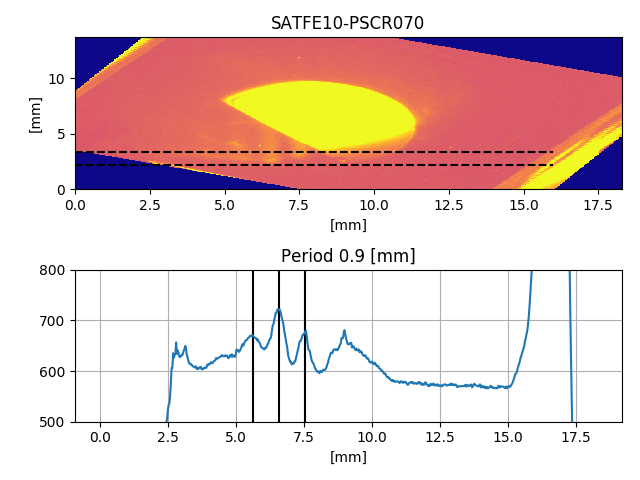

In [205]:
Range = [80,120]
plt.figure()
# plt.imshow(img, vmax=250)
plt.subplot(211)
plt.pcolormesh(y_axis,x_axis,img, cmap='plasma', vmax = 25)
plt.hlines(y_axis[Range[0]],0,16,linestyles='dashed')
plt.hlines(y_axis[Range[1]],0,16,linestyles='dashed')

plt.xlabel('[mm]')
plt.ylabel('[mm]')
plt.title(camName)

plt.subplot(212)
plt.plot(y_axis,img[Range[0]:Range[1],:].sum(axis=0))
plt.grid(True)
ylims = [500,800]
line1 = 5.65
spacing = 0.95
plt.ylim(ylims)
plt.xlabel('[mm]')
plt.title('Period %.1f [mm]'%spacing)
plt.vlines(line1, ylims[0], ylims[1])
plt.vlines(line1+spacing, ylims[0], ylims[1])
plt.vlines(line1+spacing*2, ylims[0], ylims[1])

plt.tight_layout()


plt.savefig('spacing',dpi = 300)

In [239]:
n_YAG = 1.8
thicknessYAG = 0.1e-3
thicknessBK7 = 3e-3
n_BK7 = 1.5
c = 3e8

In [240]:
theta_c_YAG = np.rad2deg(np.arcsin((c/n_YAG)/c))
theta_c_BK7 = np.rad2deg(np.arcsin((c/n_BK7)/c))

In [261]:
90-np.rad2deg(np.arctan(5/0.45))

5.1427645578842345

In [241]:
print(theta_c_YAG, theta_c_BK7)

33.748988595888584 41.810314895778596


In [254]:
deviation = 10
x_YAG = thicknessYAG/np.cos(np.deg2rad(deviation))
x_BK7 = thicknessBK7/np.cos(np.deg2rad(deviation))

print(2*x_YAG*1e3, 2*x_BK7*1e3)

0.20308532237714902 6.09255967131447
